# PREDICTOR GASTO TURÍSTICO EN OTROS 
## GMI_join_cc_cs_filtroPI_FCanarias

- SOLO PARA EL TOTAL  DE LAS ISLAS CANARIAS (NO TIENE FTV,GC,TNF...)
- TIENE LAS CARAECTEÍSTICAS DE CLIENTE
- TIENE LAS CARACTERÍSTICAS DE SOPORTE

# 03

### Aquí he intentado poder visaulizar de manera mas eficiente y entendible la división de la fecha pero es dificil ya que al convertir la columna fecha en indice, si quiero mapear se dificulta, he intentado hacerlo dejando la columana fecha y ordenando y si funciona.

# Proposito:

En este notebook nos dedicaremos a la creación del **predictor** para **gasto en otros**

In [1]:
%load_ext watermark
%watermark

Last updated: 2023-06-10T16:05:01.151523+01:00

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 126 Stepping 5, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [14]:
# Lectura y escritura de datos
# ==============================================================================
import os
import re

from distutils.dir_util import copy_tree

# Visualizar Imagenes
# ==============================================================================
from IPython.display import Image

# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado Regresion Lineal
# ==============================================================================
from sklearn.linear_model import LinearRegression

# Modelado XGBoost
# ==============================================================================
from xgboost import XGBRegressor

# Modelado Lasso
# ==============================================================================
from sklearn.linear_model import Lasso

# Modelado RandomForestRegressor
# ==============================================================================
from sklearn.ensemble import RandomForestRegressor

# Métricas de evaluación
# ==============================================================================
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Configuración warnings
# ==============================================================================
import warnings
# warnings.filterwarnings('ignore')

**WARNING**
C:\Users\angel\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED

Solucion: !pip install --upgrade panda

# 1. PREPARACION PREVIA

Primero necesitamos copiar todos nuestros archivos en una carpeta donde podramos manipularlos para así conservar los archivos originales

In [52]:
# Método que limpia la carpeta de datos volatiles ya que es 
# una carpeta activa en todos los programas que hemos generado.
def limpiaCarpetaVolatil(rutaCopia):
    print("Limpiando Carpeta Volatil...")
    for f in os.listdir(rutaCopia):
        os.remove(os.path.join(rutaCopia, f))
        
#Metodo que copia recursivamente
def copia(dir_origen,dir_destino):
    print("Copiando...")
    copy_tree(dir_origen, dir_destino)
    print("Copiado")
    print(os.listdir(dir_destino))
  


In [53]:
rutaBase= "../PredictorGastoTuristico/DatosPredictor/02/"
rutaCopia= "../PredictorGastoTuristico/DatosVolatiles/"

limpiaCarpetaVolatil(rutaCopia)
copia(rutaBase,rutaCopia)

Limpiando Carpeta Volatil...
Copiando...
Copiado
['GMI_join_cc_cs_filtroPI_FCanarias.csv']


## 1.1 Primero cargamos el archivo para visualizarlo y tratarlo.

In [54]:
gasto_medio = pd.read_csv(rutaCopia+'GMI_join_cc_cs_filtroPI_FCanarias.csv',keep_default_na=False, na_values=[""])

## 1.2 Visualización del dataset.

#### Plot()

 La usaremos para graficar una serie de tiempo, y ver la evolucion del gasto por turístas en otros.

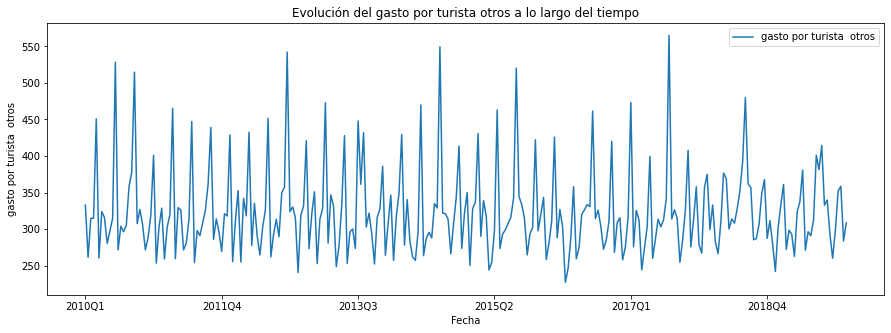

In [75]:
gasto_medio.plot(x='fecha', y='gasto por turista  otros', figsize=(15,5))
plt.title('Evolución del gasto por turista otros a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('gasto por turista  otros')
plt.show()

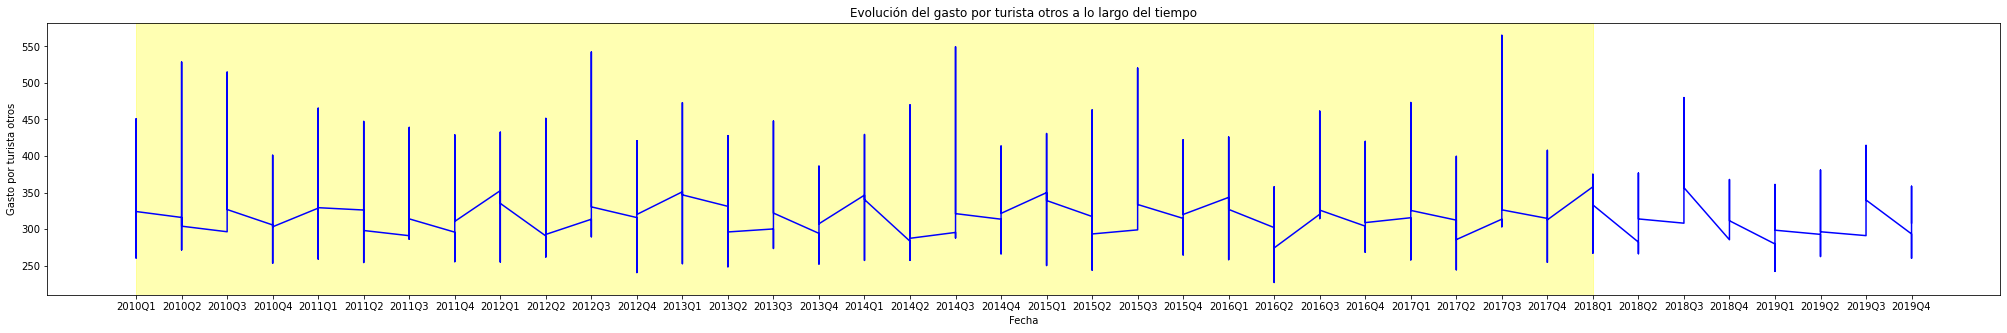

In [85]:
fecha_cambio_color = "2018Q1"

# Convertir la columna 'fecha' a tipo string
gasto_medio['fecha'] = gasto_medio['fecha'].astype('string')

# Crear la gráfica
plt.figure(figsize=(35, 5))
plt.plot(gasto_medio['fecha'], gasto_medio['gasto por turista  otros'], color='blue')
plt.title('Evolución del gasto por turista otros a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Gasto por turista otros')

# Encontrar el índice de la fecha de cambio
indice_cambio_color = gasto_medio[gasto_medio['fecha'] == fecha_cambio_color].index[0]

# Cambiar el color de la gráfica hasta la fecha de cambio
plt.axvspan(gasto_medio['fecha'].iloc[0], gasto_medio['fecha'].iloc[indice_cambio_color], color='yellow', alpha=0.3)

plt.show()

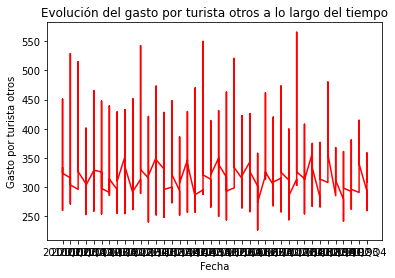

In [82]:
import matplotlib.pyplot as plt

fecha_cambio_color = ['2018Q1', '2018Q2', '2018Q3', '2018Q4']

# Convertir la columna 'fecha' a tipo string
gasto_medio['fecha'] = gasto_medio['fecha'].astype('string')

# Crear la gráfica
plt.plot(gasto_medio['fecha'], gasto_medio['gasto por turista  otros'])
plt.title('Evolución del gasto por turista otros a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Gasto por turista otros')

# Obtener los puntos de datos de la gráfica
line = plt.gca().lines[0]
x_values = line.get_xdata()
y_values = line.get_ydata()

# Cambiar el color de la línea hasta cada fecha de cambio
for fecha in fecha_cambio_color:
    indice_cambio_color = gasto_medio[gasto_medio['fecha'] == fecha].index[0]
    line.set_color('blue')
    line.set_markerfacecolor('blue')
    line.set_markeredgecolor('blue')
    for i in range(indice_cambio_color, len(x_values)):
        line.set_color('red')
        line.set_markerfacecolor('red')
        line.set_markeredgecolor('red')
        x_values[i] = x_values[i]  # Actualizar el valor para forzar el dibujo

plt.show()


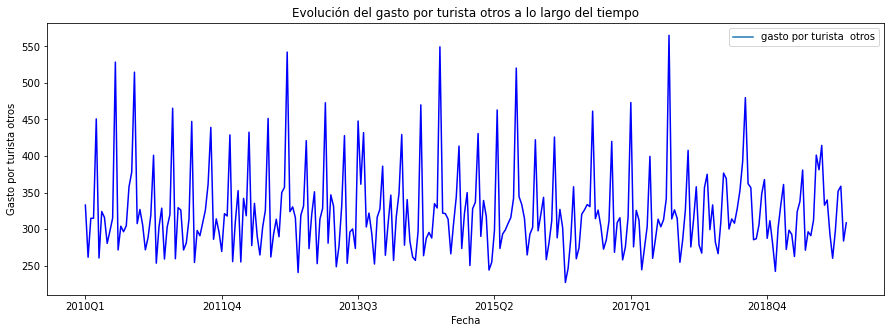

In [73]:
# Definir la fecha a partir de la cual se cambia el color

fecha_cambio_color = "2018Q1"

gasto_medio['fecha'] = gasto_medio['fecha'].astype('string')

gasto_medio.plot(x='fecha', y='gasto por turista  otros', figsize=(15,5))
plt.title('Evolución del gasto por turista otros a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('gasto por turista  otros')
plt.show()





ax = plt.gca()

# Obtener los puntos de datos de la gráfica
line = ax.lines[0]
x_values = line.get_xdata()
y_values = line.get_ydata()

# Encontrar el índice de la fecha de cambio
indice = gasto_medio[gasto_medio["fecha"] == "2018Q1"].index[0]

indice_cambio_color = x_values.tolist().index(indice)

# Cambiar el color de los puntos de datos a partir de la fecha de cambio
line.set_color('blue')  # Color antes de la fecha de cambio
line.set_markerfacecolor('red')  # Color a partir de la fecha de cambio

# Configurar etiquetas y título
plt.title('Evolución del gasto por turista otros a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Gasto por turista otros')

plt.show()

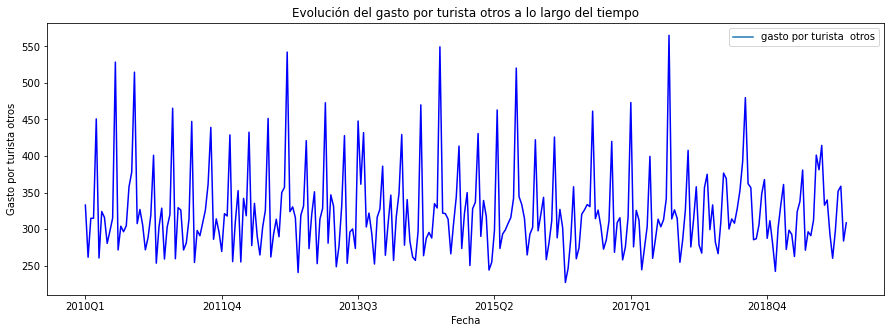

In [74]:
fecha_cambio_color = "2018Q1"

# Crear la gráfica
gasto_medio.plot(x='fecha', y='gasto por turista  otros', figsize=(15, 5))

# Convertir la columna 'fecha' a tipo string
gasto_medio['fecha'] = gasto_medio['fecha'].astype('string')

# Obtener los ejes actuales
ax = plt.gca()

# Obtener los puntos de datos de la gráfica
line = ax.lines[0]
x_values = line.get_xdata()
y_values = line.get_ydata()

# Encontrar el índice de la fecha de cambio
indice = gasto_medio[gasto_medio["fecha"] == fecha_cambio_color].index[0]
indice_cambio_color = x_values.tolist().index(indice)

# Cambiar el color de los puntos de datos a partir de la fecha de cambio
line.set_color('blue')  # Color antes de la fecha de cambio
line.set_markerfacecolor('red')  # Color a partir de la fecha de cambio

# Configurar etiquetas y título
plt.title('Evolución del gasto por turista otros a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Gasto por turista otros')

plt.show()

#### Histograma:
Aqui podemos visualizar la variabilidad del gasto en otros y su representación viendo la distribución de los valores de la variable numérica objetiva.

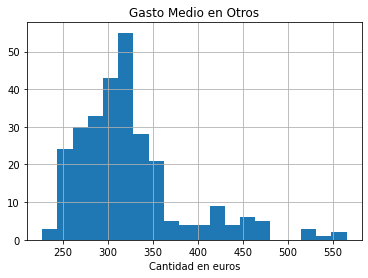

In [47]:
gasto_medio.hist(column='gasto por turista  otros', bins=20)
plt.xlabel("Cantidad en euros")
plt.title("Gasto Medio en Otros")
plt.show()

#### Gráfico de densidad:

Este grafico nos permite ver la distribución de los datos al ifual que el histograma, pero de manera más suave y continua.

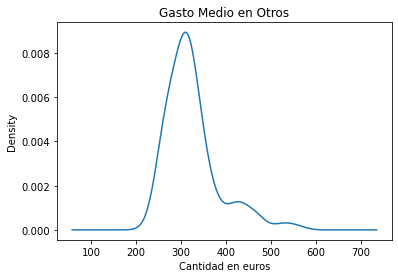

In [48]:
gasto_medio["gasto por turista  otros"].plot(kind="density")
plt.xlabel("Cantidad en euros")
plt.title("Gasto Medio en Otros")
plt.show()

#### Matriz de correlación:
Visualizamos la matriz de correlación, aunque es importante remarcar que no es determinante el hecho de que una variable este mas o menos correlacionada con otra con que nuestro algoritmo de regresión lineal le sea útil para aprender. Además, usaremos el mapa de calor(heatmaps) para visualizarlo de una manera más clara.

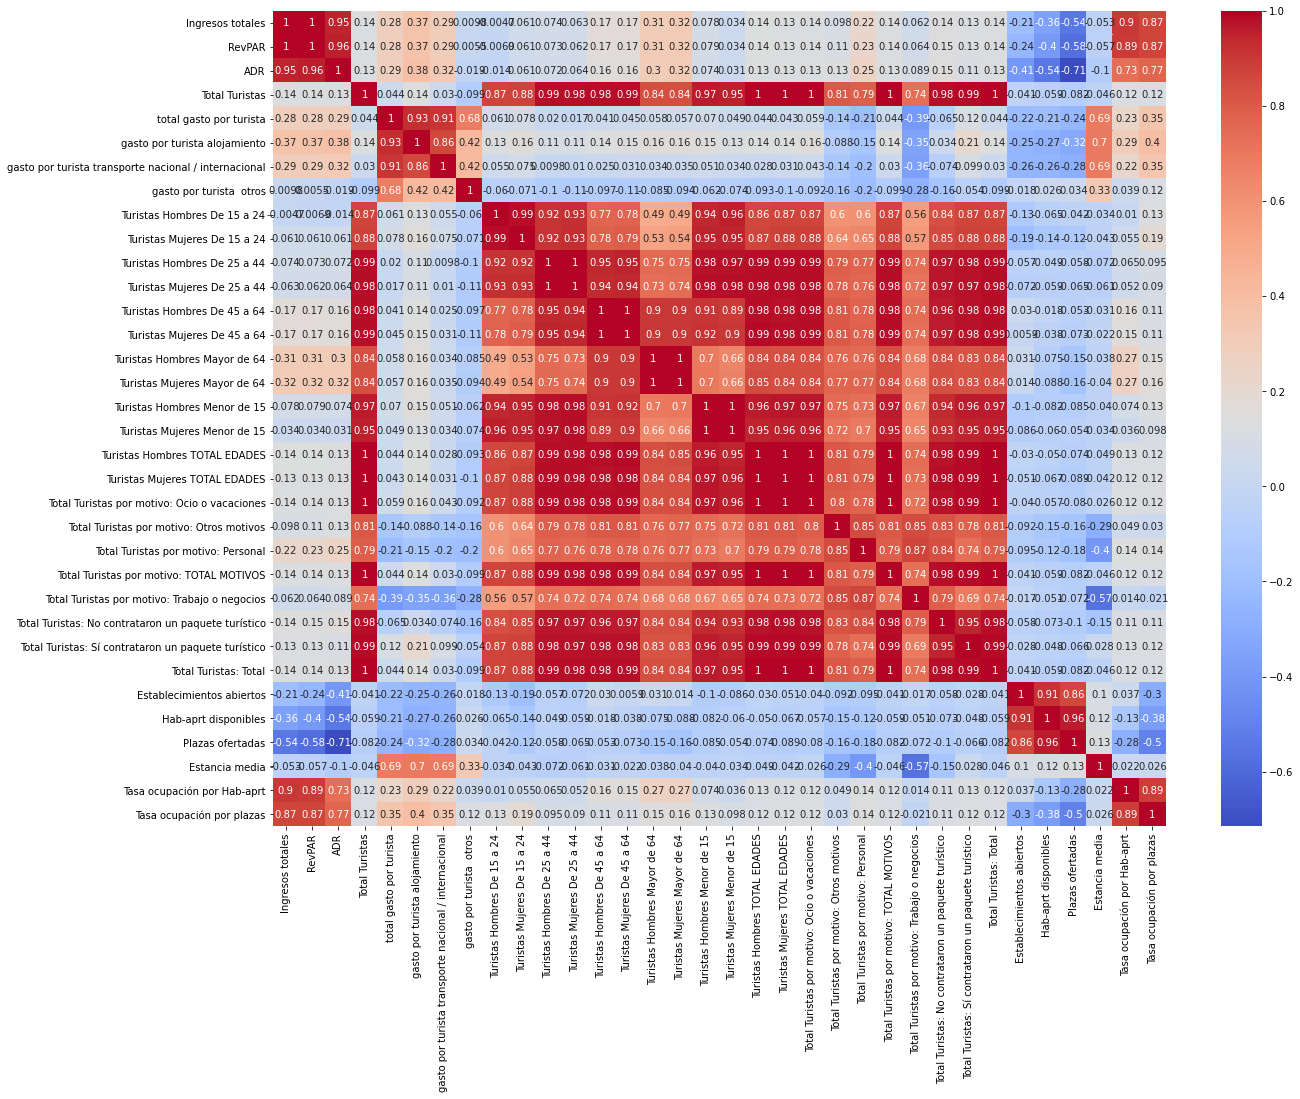

In [165]:
plt.figure(figsize=(20, 15))
sns.heatmap(gasto_medio.corr(numeric_only = True), cmap='coolwarm', annot=True)
plt.show()

Para poder ver la distribución de los datos y detectar valores atípicos (outliers) usaremos el boxplots:

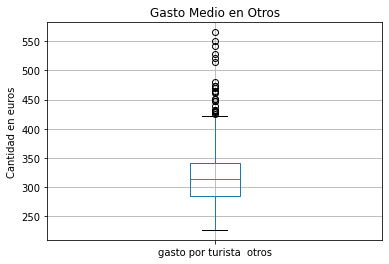

In [49]:
gasto_medio.boxplot(column="gasto por turista  otros")
plt.ylabel("Cantidad en euros")
plt.title("Gasto Medio en Otros")
plt.show()

In [33]:
# Convierto datetime 
gasto_medio['fecha'] = pd.to_datetime(gasto_medio['fecha'])
#convierto a peridoIndex
#gasto_medio['fecha'] = pd.PeriodIndex(gasto_medio.fecha, freq="Q", dtype='period[Q-DEC]')
# Ordeno columna de fechas
gasto_medio = gasto_medio.sort_values('fecha')

# Reseteo el indice
gasto_medio = gasto_medio.reset_index(drop=True)


## 1.3 Tratamiento:

Convertimos la columan fecha en PeriodIndex, usando pd.PeriodIndex(). Una vez en dicho formato, se establece como índice.

In [52]:
gasto_medio.shape

(280, 37)

In [24]:
gasto_medio.head(10
                )

,isla,fecha,Ingresos totales,RevPAR,ADR,pais,Total Turistas,total gasto por turista,gasto por turista alojamiento,gasto por turista transporte nacional / internacional,...,Total Turistas por motivo: Trabajo o negocios,Total Turistas: No contrataron un paquete turístico,Total Turistas: Sí contrataron un paquete turístico,Total Turistas: Total,Establecimientos abiertos,Hab-aprt disponibles,Plazas ofertadas,Estancia media,Tasa ocupación por Hab-aprt,Tasa ocupación por plazas
0,CANARIAS,2010Q1,6.471403e+08,40.720000,58.483333,Alemania,620920.0,1147.19,472.84,341.47,...,4134.0,154831.0,466089.0,620920.0,5524.0,528460.0,1304800.0,11.340000,69.603333,58.310000
1,CANARIAS,2010Q1,6.471403e+08,40.720000,58.483333,España,335230.0,666.96,238.65,166.80,...,53619.0,201097.0,134132.0,335230.0,5524.0,528460.0,1304800.0,4.683333,69.603333,58.310000
2,CANARIAS,2010Q1,6.471403e+08,40.720000,58.483333,Holanda,94439.0,1107.77,455.40,337.60,...,961.0,21215.0,73224.0,94439.0,5524.0,528460.0,1304800.0,10.133333,69.603333,58.310000
3,CANARIAS,2010Q1,6.471403e+08,40.720000,58.483333,Otros países,439882.0,1023.57,417.21,291.47,...,11445.0,185037.0,254843.0,439881.0,5524.0,528460.0,1304800.0,9.021667,69.603333,58.310000
4,CANARIAS,2010Q1,6.471403e+08,40.720000,58.483333,Países Nórdicos,537221.0,1193.58,448.43,294.31,...,3339.0,81875.0,455346.0,537220.0,5524.0,528460.0,1304800.0,8.546667,69.603333,58.310000
5,CANARIAS,2010Q1,6.471403e+08,40.720000,58.483333,Reino Unido,738657.0,773.64,311.91,201.25,...,5213.0,364719.0,373939.0,738657.0,5524.0,528460.0,1304800.0,8.343333,69.603333,58.310000
6,CANARIAS,2010Q1,6.471403e+08,40.720000,58.483333,TOTAL,2766346.0,976.61,387.08,265.47,...,78710.0,1008773.0,1757572.0,2766346.0,5524.0,528460.0,1304800.0,8.430000,69.603333,58.310000
7,CANARIAS,2010Q2,4.525190e+08,28.616667,53.126667,Otros países,408595.0,1017.30,423.18,279.12,...,12467.0,182927.0,225668.0,408593.0,5384.0,520193.0,1281271.0,7.748333,53.913333,45.866667
8,CANARIAS,2010Q2,4.525190e+08,28.616667,53.126667,Alemania,472425.0,1125.02,474.87,334.20,...,4709.0,118358.0,354067.0,472425.0,5384.0,520193.0,1281271.0,9.966667,53.913333,45.866667
9,CANARIAS,2010Q2,4.525190e+08,28.616667,53.126667,Holanda,82049.0,1013.73,418.29,298.08,...,907.0,21613.0,60436.0,82049.0,5384.0,520193.0,1281271.0,9.026667,53.913333,45.866667


### Variables dummy:

Necesitamos pasar las variables categóricas a variables numéricas binarias, asi convertiremos el campo paises en columnas, y le asignaremso un 1 en la columna correspondiente si la observación pertenece a ese valor, y 0 en caso contrario.

Además, debemos tener en cuenta que siempre **debemos omitir una variable categórica** para **evitar la multicolinealidad** ya que si las ponemos todas creamos una dependencia circular.

In [19]:
df = pd.get_dummies(gasto_medio, columns=['pais'])
gasto_medio = df

### NOTA:
**Para evitar el sigueiente error:**

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

**Debemos eliminar los valores nulos de las columnas del df**

In [20]:
gasto_medio = gasto_medio.dropna()

In [21]:
gasto_medio.columns

Index(['isla', 'fecha', 'Ingresos totales', 'RevPAR', 'ADR', 'Total Turistas',
       'total gasto por turista', 'gasto por turista alojamiento',
       'gasto por turista transporte nacional / internacional',
       'gasto por turista  otros', 'Turistas Hombres De 15 a 24',
       'Turistas Mujeres De 15 a 24', 'Turistas Hombres De 25 a 44',
       'Turistas Mujeres De 25 a 44', 'Turistas Hombres De 45 a 64',
       'Turistas Mujeres De 45 a 64', 'Turistas Hombres Mayor de 64',
       'Turistas Mujeres Mayor de 64', 'Turistas Hombres Menor de 15',
       'Turistas Mujeres Menor de 15', 'Turistas Hombres TOTAL EDADES',
       'Turistas Mujeres TOTAL EDADES',
       'Total Turistas por motivo: Ocio o vacaciones',
       'Total Turistas por motivo: Otros motivos',
       'Total Turistas por motivo: Personal',
       'Total Turistas por motivo: TOTAL MOTIVOS',
       'Total Turistas por motivo: Trabajo o negocios',
       'Total Turistas: No contrataron un paquete turístico',
       'Tota

### Columnas a eliminar:

- **quite total gasto por turista** ya que al final es la suma de todos los gastos asique facilita la predicción... al ser una variable dependiente de otras, aporta demasiada información
- **quite gasto por turista  otros** porque es la variable a predecir...
- **quite isla** porque CANARIAS es la única que hay asi que esa columna puede quitarse
- **quite pais_Total** para evitar la multicolinealidad de las **variables dummy**


In [22]:
#Creamos un array con todas las variables independientes que vamos a usar en la Regresion Lineal
nombres_variables_independientes = [
       'Ingresos totales', 'RevPAR', 'ADR', 'Total Turistas',
       
       'gasto por turista alojamiento',
       'gasto por turista transporte nacional / internacional', 
    
        'Turistas Hombres De 15 a 24',
       'Turistas Mujeres De 15 a 24', 'Turistas Hombres De 25 a 44',
       'Turistas Mujeres De 25 a 44', 'Turistas Hombres De 45 a 64',
       'Turistas Mujeres De 45 a 64', 'Turistas Hombres Mayor de 64',
       'Turistas Mujeres Mayor de 64', 'Turistas Hombres Menor de 15',
       'Turistas Mujeres Menor de 15', 'Turistas Hombres TOTAL EDADES',
       'Turistas Mujeres TOTAL EDADES',
       'Total Turistas por motivo: Ocio o vacaciones',
       'Total Turistas por motivo: Otros motivos',
       'Total Turistas por motivo: Personal',
       'Total Turistas por motivo: TOTAL MOTIVOS',
       'Total Turistas por motivo: Trabajo o negocios',
       'Total Turistas: No contrataron un paquete turístico',
       'Total Turistas: Sí contrataron un paquete turístico',
       'Total Turistas: Total', 'Establecimientos abiertos',
       'Hab-aprt disponibles', 'Plazas ofertadas', 'Estancia media',
       'Tasa ocupación por Hab-aprt', 'Tasa ocupación por plazas',
       'pais_Alemania', 'pais_España', 'pais_Holanda', 'pais_Otros países',
       'pais_Países Nórdicos', 'pais_Reino Unido' ]

In [23]:
#creamos la variable objetivo
nombre_variable_objetiva = ['gasto por turista  otros']

## 1.4. AQUÍ DIVIDIMOS EL DATASET EN TRAIN Y TEST

In [24]:
aux1 = gasto_medio[nombres_variables_independientes]
aux2 = gasto_medio[nombre_variable_objetiva]

Fechas train : 0 --- 223  (n=224)
Fechas test  : 224 --- 279  (n=56)
Fechas train variable objetivo: 0 --- 223  (n=224)
Fechas test variable objetivo: 224 --- 279  (n=56)


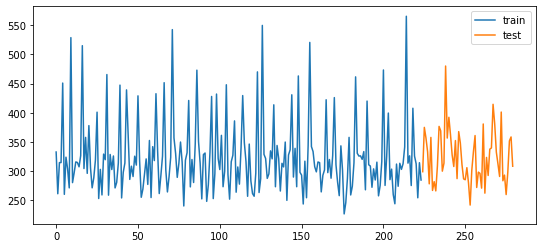

In [59]:
# Separación datos train-test
# ==============================================================================

# el data set tiene 1390 filas y 24 columnas
# hay 10 fechas distintas asique steps = 280/10 = 28 que es la cantidad de steps para visualizar un año

# esto pasa porque hay 10 fechas diferentes, pero tambien hay 7 paises, por lo que el numero
# de ocurrencias de una misma fecha es multiple.

# por tanto para coger e test 2018 y 2019, steps debe valer 28*2 = 56
# para 2017 - 2019 28*3 = 84

steps = 28*2
X_train = aux1[:-steps]
X_test  = aux1[-steps:]

Y_train = aux2[:-steps]
Y_test  = aux2[-steps:]

print(f"Fechas train : {X_train.index.min()} --- {X_train.index.max()}  (n={len(X_train)})")
print(f"Fechas test  : {X_test.index.min()} --- {X_test.index.max()}  (n={len(X_test)})")


print(f"Fechas train variable objetivo: {Y_train.index.min()} --- {Y_train.index.max()}  (n={len(Y_train)})")
print(f"Fechas test variable objetivo: {Y_test.index.min()} --- {Y_test.index.max()}  (n={len(Y_test)})")

fig, ax = plt.subplots(figsize=(9, 4))
Y_train['gasto por turista  otros'].plot(ax=ax, label='train')
Y_test['gasto por turista  otros'].plot(ax=ax, label='test')
ax.legend();

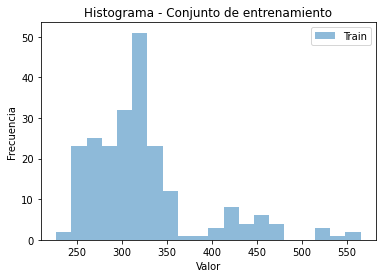

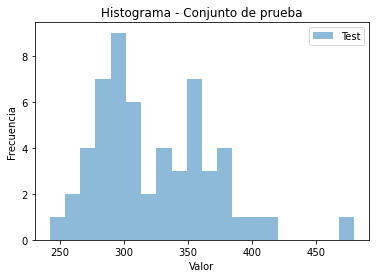

In [60]:
import matplotlib.pyplot as plt

# Visualización del conjunto de entrenamiento
plt.hist(Y_train['gasto por turista  otros'], bins=20, alpha=0.5, label='Train')
plt.title('Histograma - Conjunto de entrenamiento')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()

plt.show()

# Visualización del conjunto de prueba
plt.hist(Y_test['gasto por turista  otros'], bins=20, alpha=0.5, label='Test')
plt.title('Histograma - Conjunto de prueba')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()

plt.show()

## 1.5 Escalado de datos


Escalar los datos con StandardScaler, es una técnica común de preprocesamiento en aprendizaje automático para transformar los datos de entrada de tal manera que tengan media cero y una desviación estándar de uno.

De esta manera, los datos tendrán una escala uniforme, mejorarando la precisión y el rendimiento de los modelos.

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2. PREDICTOR

Nota: Predecir 2017-2019 da mejores resultados qque 2018-2019

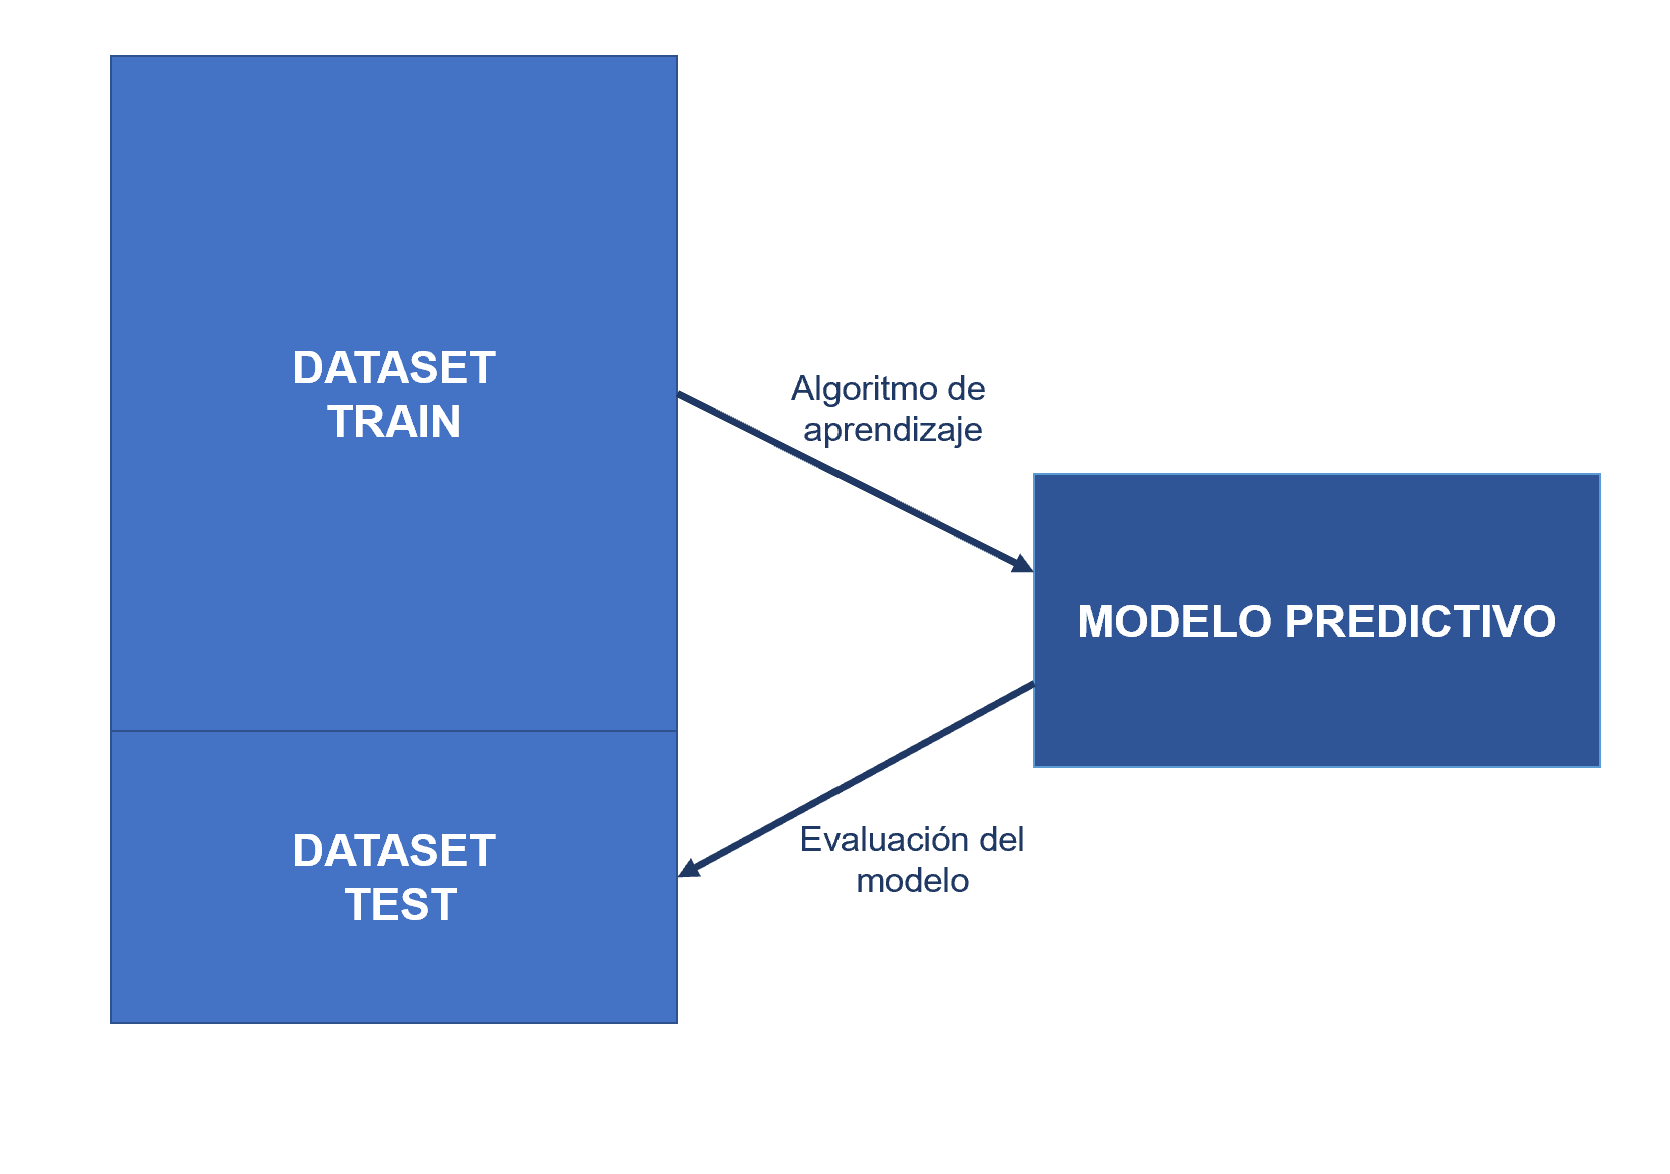

In [62]:
Image("../PredictorGastoTuristico/OtrosRecursos/Imagenes/img01.png")

## 2.1 MEDIDAS DE EVALUACIÓN DEL MODELO

Aqui definimso las **Medidas de evaluación:**

    - RMSE (Root Mean Squared Error) Raiz cuadrada del error absoluto medio al cuadrado
    - adjusted_r2 Coeficiente de Determinacion ajustado
    - MAE (Mean Absolute error)

In [63]:
def rmse(objetivo, estimaciones):
    return np.sqrt(metrics.mean_squared_error(objetivo, estimaciones))

def adjusted_r2(objetivo, estimaciones, n, k):
    r2 = metrics.r2_score(objetivo, estimaciones)
    return 1 - (1-r2)*(n-1) / (n - k - 1)

def evaluar_modelo(objetivo, estimaciones, n, k):
    return {
        "rmse": rmse(objetivo, estimaciones),
        "mae": metrics.mean_absolute_error(objetivo, estimaciones),
        "adjusted_r2": adjusted_r2(objetivo, estimaciones, n, k),
           }


## 2.2 MODELO DE REGRESION LINEAL (OLS)



In [64]:
RESULTADOS_OLS = {}

modelo_ols = LinearRegression()
modelo_ols.fit(X=X_train, y=Y_train)
modelo_ols_train_preds = modelo_ols.predict(X_train)
modelo_ols_test_preds = modelo_ols.predict(X_test)


RESULTADOS_OLS["OLS_train"] = evaluar_modelo(
    Y_train,
    modelo_ols_train_preds,
    X_train.shape[0],
    len(modelo_ols.coef_)
)

RESULTADOS_OLS["OLS_test"] = evaluar_modelo(
    Y_test,
    modelo_ols_test_preds,
    X_test.shape[0],
    len(modelo_ols.coef_)
)

pd.DataFrame(RESULTADOS_OLS)

,OLS_train,OLS_test
rmse,19.332206,47.779477
mae,13.560794,38.819622
adjusted_r2,0.904312,-0.126527


## 2.3. MODELO XGBoost

### (GRADIENT_BOOSTING)


La regresión lineal es uno de los muchos algoritmos que se pueden utilizar para resolver problemas de regresión. Es posible que otros algoritmos de regresión produzcan mejores resultados. La estrategia general consiste en experimentar con diferentes regresores para comparar puntuaciones.

**Hay una amplia gama de regresores, incluidos árboles de decisión, bosques aleatorios, aumento de gradiente XGBoost**

Aquí usaresmos el XGBoost que incluye un regresor, llamado XGBRegressor, que puede usarse en cualquier conjunto de datos de regresión. 

Usemos ahora XGBRegressor para comparar los resultados del conjunto de datos de gasto con los datos que obtuvimos en la regresión lineal.

Primero hay que instalarlo si no lo tenemos: **pip install xgboost**

In [65]:
RESULTADOS_XGBR = {}

modelo_xgreg = XGBRegressor()
modelo_xgreg.fit(X=X_train, y=Y_train)
modelo_xgreg_train_preds = modelo_xgreg.predict(X_train)
modelo_xgreg_test_preds = modelo_xgreg.predict(X_test)


RESULTADOS_XGBR["XGBR_train"] = evaluar_modelo(
    Y_train,
    modelo_xgreg_train_preds,
    X_train.shape[0],
    len(modelo_xgreg.feature_importances_)
)

RESULTADOS_XGBR["XGBR_test"] = evaluar_modelo(
    Y_test,
    modelo_xgreg_test_preds,
    X_test.shape[0],
    len(modelo_xgreg.feature_importances_)
)

pd.DataFrame(RESULTADOS_XGBR)

,XGBR_train,XGBR_test
rmse,0.006647,34.036706
mae,0.004779,27.991318
adjusted_r2,1.000000,-0.815928


## 2.4. MODELO LASSO

In [66]:
RESULTADOS_LASSO = {}

modelo_lasso = Lasso(alpha=0.1)

modelo_lasso.fit(X=X_train, y=Y_train)
modelo_lasso_train_preds = modelo_lasso.predict(X_train)
modelo_lasso_test_preds = modelo_lasso.predict(X_test)

RESULTADOS_LASSO["LASSO_train"] = evaluar_modelo(
    Y_train,
    modelo_lasso_train_preds,
    X_train.shape[0],
    len(modelo_lasso.coef_)
)

RESULTADOS_LASSO["LASSO_test"] = evaluar_modelo(
    Y_test,
    modelo_lasso_test_preds,
    X_test.shape[0],
    len(modelo_lasso.coef_)
)


pd.DataFrame(RESULTADOS_LASSO)

,LASSO_train,LASSO_test
rmse,20.072578,45.595889
mae,13.580272,34.194743
adjusted_r2,0.876211,-2.258780


## 2.5. RandomForestRegressor:

Es un modelo de regresión que se basa en la construcción de múltiples árboles de decisión y utiliza un promedio de los resultados para realizar las predicciones.

In [67]:
RESULTADOS_RFR = {}



modelo_rfr = RandomForestRegressor(n_estimators=25, random_state=30)

modelo_rfr.fit(X=X_train, y= np.ravel(Y_train))
modelo_rfr_train_preds = modelo_rfr.predict(X_train)
modelo_rfr_test_preds = modelo_rfr.predict(X_test)

RESULTADOS_RFR["RFR_train"] = evaluar_modelo(
    Y_train,
    modelo_rfr_train_preds,
    X_train.shape[0],
    len(modelo_rfr)
)

RESULTADOS_RFR["RFR_test"] = evaluar_modelo(
    Y_test,
    modelo_rfr_test_preds,
    X_test.shape[0],
    len(modelo_rfr)
)


pd.DataFrame(RESULTADOS_RFR)

,RFR_train,RFR_test
rmse,10.151178,35.678184
mae,6.134507,29.966986
adjusted_r2,0.970419,-0.130672


# 3. VISUALIZAMOS LA COMPARACION DE TODOS LOS MODELOS

In [68]:
aux = [RESULTADOS_OLS,RESULTADOS_XGBR,RESULTADOS_LASSO,RESULTADOS_RFR]

modelos = pd.DataFrame()
for elemento in aux:
   modelos = pd.merge(modelos,pd.DataFrame(elemento), how="outer", left_index=True, right_index=True)

modelos.head()


,OLS_train,OLS_test,XGBR_train,XGBR_test,LASSO_train,LASSO_test,RFR_train,RFR_test
rmse,19.332206,47.779477,0.006647,34.036706,20.072578,45.595889,10.151178,35.678184
mae,13.560794,38.819622,0.004779,27.991318,13.580272,34.194743,6.134507,29.966986
adjusted_r2,0.904312,-0.126527,1.000000,-0.815928,0.876211,-2.258780,0.970419,-0.130672


## 3.1. HAREMOS UNA COMPARACIÓN SOBRE LOS DATOS PREDICHOS Y LOS DATOS REALES

In [69]:
diccionario = {'Valor Real': Y_test.to_numpy().flatten().tolist(),
                'Prediccion OLS' : modelo_ols_test_preds.flatten().tolist(),
                'Prediccion XGBR' : modelo_xgreg_test_preds.flatten().tolist(),
                'Prediccion LASSO' : modelo_lasso_test_preds.flatten().tolist(),
                'Prediccion RFR' : modelo_rfr_test_preds.flatten().tolist()}

In [70]:
comparaciones = pd.DataFrame(diccionario)
comparaciones.head(3)

,Valor Real,Prediccion OLS,Prediccion XGBR,Prediccion LASSO,Prediccion RFR
0,299.24,265.714951,273.355255,265.120135,276.3452
1,375.04,463.968004,442.440369,467.009917,433.4372
2,356.88,316.075862,317.175781,316.920062,313.9716


## 3.2. Visualización sobre como se ajusta cada uno de los modelos al valor real

In [71]:
comp_ols   = comparaciones[['Valor Real','Prediccion OLS']]
comp_xgbr  = comparaciones[['Valor Real','Prediccion XGBR']]
comp_lasso = comparaciones[['Valor Real','Prediccion LASSO']]
comp_rfr   = comparaciones[['Valor Real','Prediccion RFR']]

comp_rfr.head()

,Valor Real,Prediccion RFR
0,299.24,276.3452
1,375.04,433.4372
2,356.88,313.9716
3,333.11,306.9688
4,278.47,256.0404


### 3.2.1 Visualización Modelo OLS

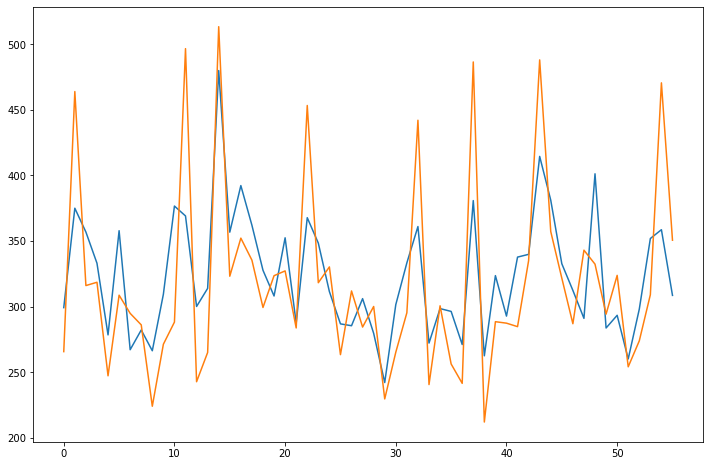

In [72]:
# Crear la figura y definir su tamaño
fig, ax = plt.subplots(figsize=(12, 8))
# Crear el plot 
ax.plot(comp_ols)
plt.show()

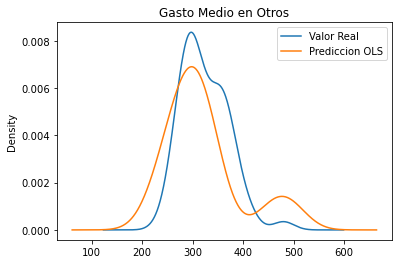

In [73]:
comp_ols.plot(kind="density")
plt.title("Gasto Medio en Otros")
plt.show()

### 3.2.2 Visualización Modelo XGBR

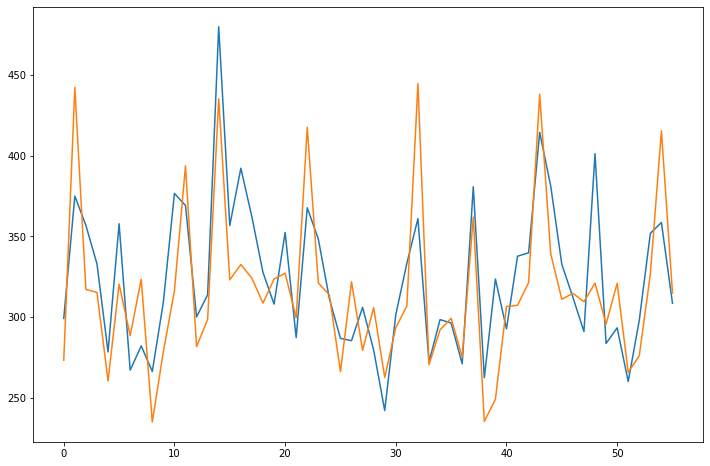

In [74]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(comp_xgbr )
plt.show()

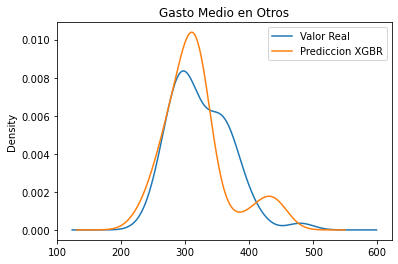

In [75]:
comp_xgbr.plot(kind="density")
plt.title("Gasto Medio en Otros")
plt.show()

### 3.2.3 Visualización Modelo OLS

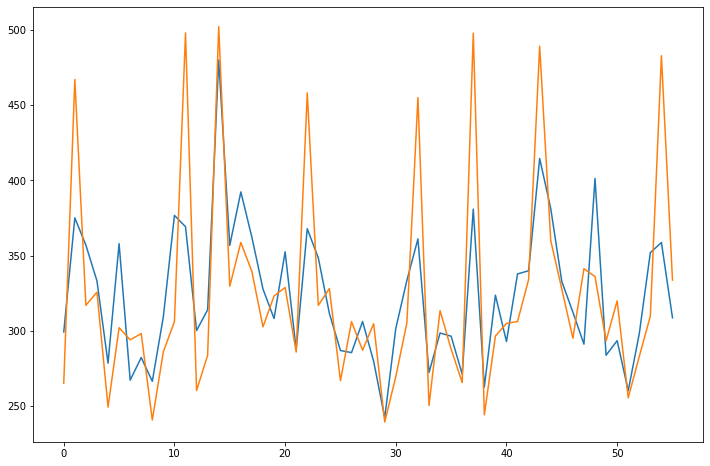

In [76]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(comp_lasso)
plt.show()

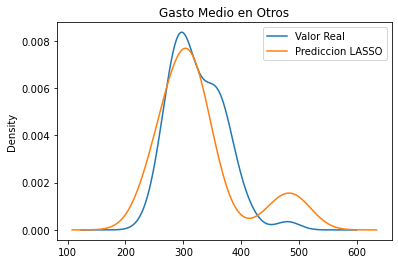

In [77]:
comp_lasso.plot(kind="density")
plt.title("Gasto Medio en Otros")
plt.show()

### 3.2.4 Visualización Modelo OLS

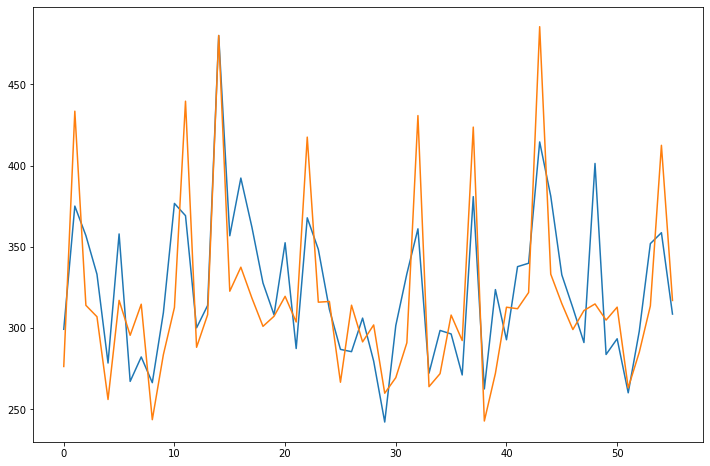

In [78]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(comp_rfr)
plt.show()

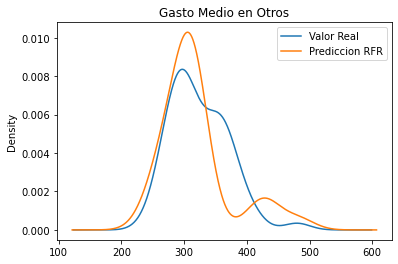

In [79]:
comp_rfr.plot(kind="density")
plt.title("Gasto Medio en Otros")
plt.show()

### 3.2.5 Los comparamos todos:

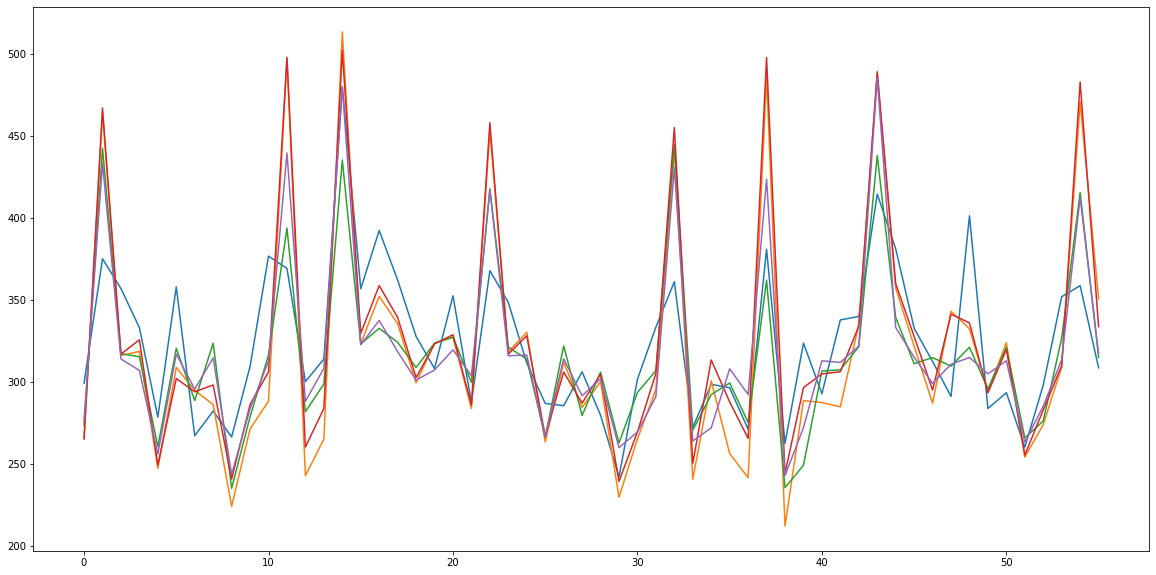

In [80]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(comparaciones)
plt.show()

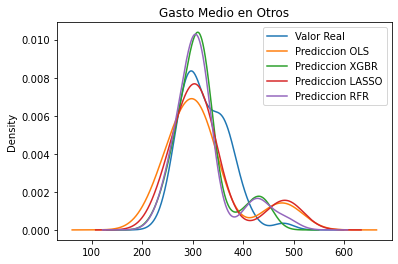

In [81]:
comparaciones.plot(kind="density")
plt.title("Gasto Medio en Otros")
plt.show()

Si los observamos todos podemos ver como el que puede llegar a arrojar mejores resultados seria la predicción con Lasso aunque podemos observar como a un siendo satisfactoria, hay diferencias entre lo real y lo predicho...